In [77]:
%load_ext autoreload
%autoreload 2

import cv2
from pathlib import Path
import numpy as np
import sys
sys.path.append('..')
from robustpca.general import ROOT_DIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
yale_data_dir  = Path(ROOT_DIR, 'data', 'CroppedYale')
assert yale_data_dir.exists()

$sgn(X)max(|X| - \lambda (CC^{\top})^{-1}) , X = (Y - P)C^T(CC^T)^{-1}$

In [79]:
human_id = 1

faces = []
for face_path in sorted(list(yale_data_dir.glob('*')))[human_id].glob('*.pgm'):
    arr = cv2.imread(face_path.as_posix())[:, :, 0]
    faces.append(arr)

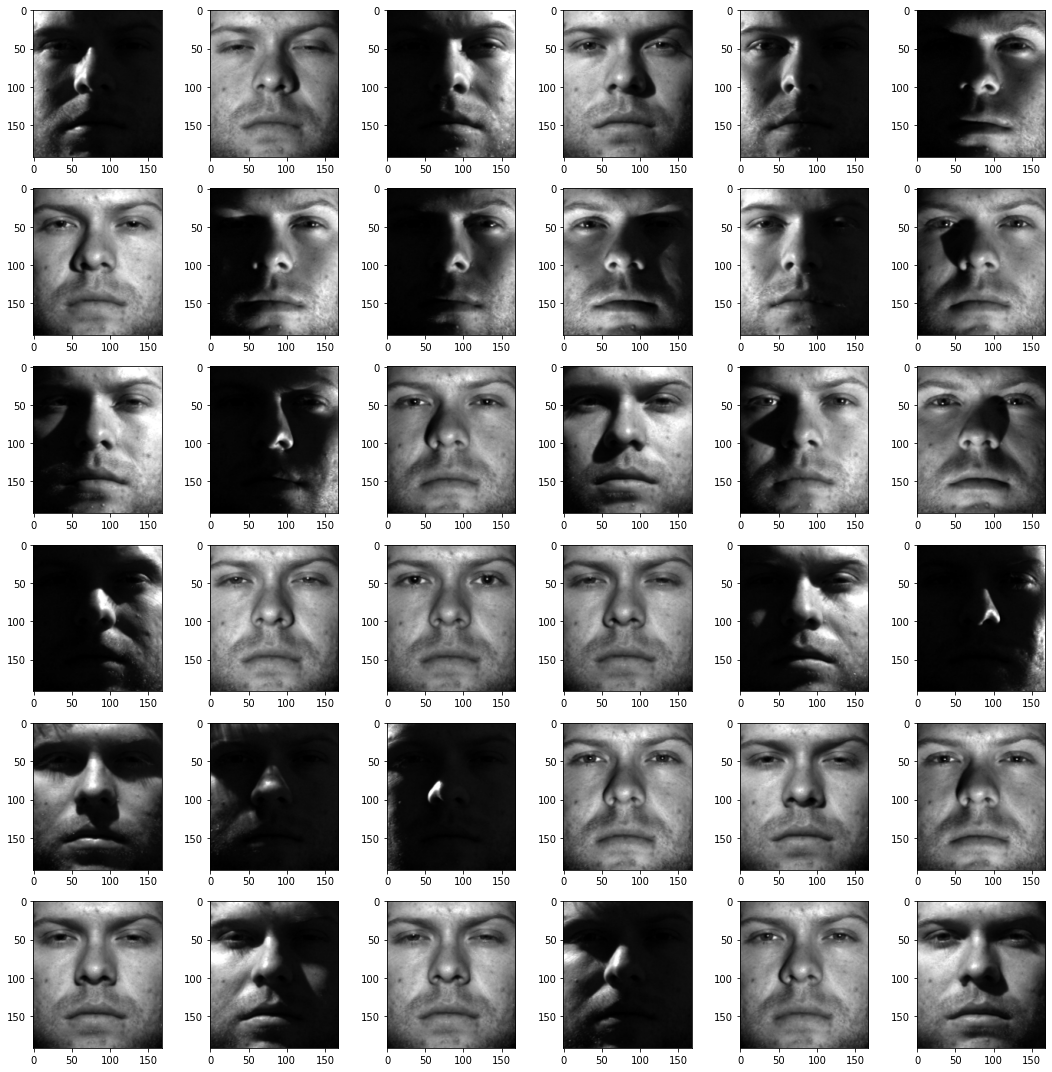

In [80]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(6, 6, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(faces[i], cmap='gray')

fig.tight_layout()

In [81]:
data_mat = np.stack(faces, -1).reshape(-1, len(faces))
# data_mat = data_mat.T
data_mat.shape

(32256, 65)

In [85]:
np.random.seed(0)
n, d = data_mat.shape
m = 30
C = np.random.normal(0, 1 / 3, (d, m))
C = np.abs(C)
Y = data_mat @ C
print(C)

[[0.58801745 0.13338574 0.32624599 ... 0.06239462 0.5109264  0.48978626]
 [0.05164914 0.12605417 0.29592858 ... 0.10082397 0.2114407  0.12091372]
 [0.22415348 0.11985105 0.27104876 ... 0.05997495 0.35691754 0.35148391]
 ...
 [0.24695557 0.20276372 0.21357524 ... 0.46618736 0.13263737 0.26085963]
 [0.57440942 0.5991798  0.11895718 ... 0.70796334 0.15319497 0.09335262]
 [0.46351132 0.5471162  0.0516786  ... 0.73276545 0.33022364 0.33422286]]


In [86]:
from robustpca.pcp import CompressionPCP

In [87]:
comppcp_iterative = CompressionPCP()
mu = comppcp_iterative.default_mu(Y)
P, S = comppcp_iterative.decompose(Y, C, mu, d, tol=1e-5, verbose=True)

it=0
S=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
P=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
it=1
S=array([[-1.33294106e+11, -2.97044009e+12, -2.29142572e+12, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-1.33294106e+11, -2.97044009e+12,  2.29142572e+12, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-1.33294106e+11, -2.97044009e+12, -2.29142572e+12, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.33294106e+11,  2.97044009e+12,  2.29142572e+12, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e

it=8
S=array([[-1.28228152e+18, -1.71407284e+18,  1.59213903e+17, ...,
         1.71090604e+17, -5.22069792e+17, -4.79506723e+18],
       [ 8.24891516e+16, -1.97149620e+18, -1.18215235e+18, ...,
         1.02237500e+17,  6.48493515e+16,  7.27528019e+17],
       [-3.18684924e+17, -2.97252605e+18, -1.65330499e+18, ...,
         2.90790930e+17, -3.22083135e+17,  5.88366369e+17],
       ...,
       [ 2.72828960e+18, -7.44713888e+18,  4.60334066e+18, ...,
        -5.08438835e+17,  1.10627275e+18,  2.89706207e+18],
       [-4.52240643e+18, -2.68022183e+19, -1.62796833e+19, ...,
         2.20517963e+18,  3.65614647e+17, -4.98249418e+18],
       [-3.46651867e+16, -2.24543098e+19, -1.76778080e+19, ...,
         1.84333874e+18,  1.11656903e+18,  1.39670872e+19]])
P=array([[-1.68400875e+17, -9.68131687e+17, -3.52271501e+17, ...,
         1.29047644e+17,  3.10552367e+17, -7.57339903e+17],
       [-3.89223744e+16, -1.43067807e+17,  1.25908784e+16, ...,
        -8.33388256e+16, -1.17844265e+17,  1.3

it=14
S=array([[-3.86263175e+22,  3.36967073e+23,  1.98194325e+23, ...,
        -1.11025408e+22,  1.80846041e+21,  8.16009312e+22],
       [ 6.39273080e+20, -8.57733485e+22, -4.98938965e+22, ...,
        -1.85826203e+21,  6.36975024e+20,  5.14613435e+22],
       [ 5.81878601e+23,  6.47114012e+24,  1.59021174e+24, ...,
        -3.72659983e+23,  1.27393851e+23, -1.36544157e+24],
       ...,
       [ 1.45681810e+23, -1.06542011e+24, -4.35007799e+23, ...,
         8.54194079e+21,  5.09410837e+21,  5.84415947e+23],
       [ 4.35006868e+23,  1.39112223e+24, -2.60823830e+23, ...,
         8.06569383e+22, -2.32951832e+22, -9.54201662e+22],
       [-2.99677562e+25, -1.46092027e+26, -5.71011274e+25, ...,
         4.13172429e+25, -1.15502027e+25,  4.22334297e+25]])
P=array([[-1.62963323e+22, -4.52858974e+22, -3.22435694e+22, ...,
        -1.70585321e+22, -1.40618970e+22, -2.33795741e+22],
       [ 4.90224425e+21,  1.66728074e+22,  8.68157284e+21, ...,
        -9.60831180e+20,  3.41311284e+19,  6.

it=20
S=array([[ 1.13774662e+28,  4.24154768e+28, -2.68037265e+28, ...,
        -1.87832450e+28,  6.94271813e+27,  1.02173735e+28],
       [-3.14394109e+27, -3.53580582e+28, -1.76300626e+28, ...,
         1.87239379e+27, -1.45463027e+27,  1.73906673e+28],
       [-4.31535327e+29, -2.25728029e+30, -4.15998904e+29, ...,
        -5.82684216e+27, -2.54067808e+29,  1.22562253e+30],
       ...,
       [ 1.81518828e+27, -7.95128282e+28, -1.01698249e+28, ...,
        -3.39838771e+27,  6.01851515e+27,  2.38030868e+28],
       [ 8.68938249e+27,  2.04170018e+29,  4.41282498e+28, ...,
        -2.28871927e+28,  1.04369175e+28, -4.55220228e+27],
       [ 3.73539147e+30,  9.49282322e+29, -1.44102135e+29, ...,
        -3.23814048e+30,  2.02858583e+30,  3.65080014e+30]])
P=array([[ 6.88276804e+27,  2.12905689e+28,  1.12109969e+28, ...,
        -1.74743854e+27,  2.78218166e+27,  1.03067123e+28],
       [ 1.05359733e+27,  1.17984973e+26,  1.51408547e+27, ...,
        -1.32692606e+26,  1.48276665e+27,  6.

it=26
S=array([[-6.70714824e+32, -1.73985629e+33, -1.66672383e+33, ...,
         3.25882981e+32, -1.05246109e+32, -2.57564849e+32],
       [-5.84209894e+32,  1.12168547e+33, -1.22512598e+32, ...,
        -4.58206113e+31, -3.10569588e+32, -9.86319687e+32],
       [-1.35538948e+35, -3.44229993e+35, -1.94801884e+35, ...,
         1.89794043e+35, -2.54563305e+34, -2.13411576e+35],
       ...,
       [-1.99585959e+32,  8.70149337e+33,  4.78307115e+31, ...,
         1.77321030e+33, -1.56152636e+33, -2.81153950e+33],
       [ 1.03816165e+33, -1.11191127e+33, -4.01841898e+32, ...,
        -5.11582028e+32,  3.97460096e+32,  1.67325534e+32],
       [-8.63440222e+34, -7.82762428e+35, -4.45627744e+35, ...,
         2.58842054e+34,  5.06478913e+32,  3.44180013e+35]])
P=array([[-2.35524009e+32, -6.78796261e+32, -1.77567124e+32, ...,
        -2.47770192e+32, -1.97606854e+32, -1.32698349e+32],
       [-2.64607058e+32, -1.85921098e+32, -3.22483460e+32, ...,
        -1.88849315e+32, -2.31407899e+32, -1.

         8.12277448e+38, -4.69160129e+38, -2.18119028e+38]])
it=32
S=array([[ 7.87214890e+36,  7.01814570e+37,  4.71183525e+37, ...,
        -1.09879480e+37,  2.46871555e+36, -1.79630078e+37],
       [-2.21708264e+37, -1.79456949e+38, -1.33967938e+38, ...,
         3.55009726e+37, -1.09316542e+36,  5.73377043e+37],
       [-2.50908615e+38, -2.97225004e+38,  9.80638054e+37, ...,
         8.56582240e+37, -1.72175096e+38, -5.65305390e+38],
       ...,
       [ 3.85945955e+38, -5.52381565e+39, -9.76565234e+38, ...,
        -4.86403885e+37,  1.83623082e+38,  3.56599302e+39],
       [ 1.54697399e+38, -1.43041868e+39, -6.46532194e+38, ...,
         4.73124979e+37, -9.11122171e+37,  5.36124551e+38],
       [ 7.77298725e+39, -3.06812858e+41, -1.09205804e+41, ...,
         2.36893219e+40,  2.51826036e+40,  1.60589970e+41]])
P=array([[-1.31988958e+36,  9.51326540e+36,  1.27521024e+36, ...,
        -1.52125318e+37, -1.30945918e+37, -1.01486872e+36],
       [ 2.75996614e+35, -4.50896078e+36,  3.664

it=39
S=array([[-1.46409831e+43,  3.29615767e+43, -4.67017043e+43, ...,
         1.19907481e+43, -5.80673879e+42, -6.97966800e+42],
       [ 1.35284930e+43, -4.25687989e+43, -7.46536956e+42, ...,
        -1.09075192e+43,  4.32167102e+42,  4.11742980e+43],
       [ 4.62454409e+43, -1.15896836e+45, -6.01492590e+44, ...,
         2.49401781e+43,  4.92844098e+43,  5.84167594e+44],
       ...,
       [-2.14914558e+43, -2.97852537e+44, -5.11765106e+44, ...,
         1.25883574e+44, -2.09586893e+44,  2.04397099e+44],
       [-1.75120155e+44, -3.72335698e+43, -5.91575380e+43, ...,
         1.85277506e+44, -8.50240172e+43,  8.68359382e+43],
       [-1.25718551e+46, -3.63099924e+47, -1.02199421e+47, ...,
         4.47053604e+46, -2.19350931e+46,  3.87185788e+45]])
P=array([[-4.52140994e+42, -9.67588690e+42, -6.37338133e+42, ...,
        -3.41962987e+41,  8.63383315e+41, -6.96572870e+42],
       [ 1.40577511e+42,  6.85984728e+42,  3.54877944e+42, ...,
         1.49442562e+42, -6.76580663e+41,  2.

it=45
S=array([[ 8.64909457e+46, -6.26603071e+48, -2.05460168e+48, ...,
         7.46876930e+47, -3.37867822e+47,  2.55597417e+48],
       [ 3.17739516e+45,  1.52284302e+47,  2.93990658e+47, ...,
         2.76380441e+45, -6.36500476e+45, -1.05914022e+46],
       [-1.92146314e+48, -1.60101555e+49, -1.42481530e+48, ...,
         2.45163856e+48, -3.58348291e+48, -1.19948464e+48],
       ...,
       [-4.11668248e+48, -5.25353846e+49, -2.30269404e+49, ...,
        -3.10371246e+48, -1.41888708e+48,  3.80428111e+49],
       [ 5.87317831e+48,  3.11315555e+49,  1.11238901e+49, ...,
        -6.98777178e+48,  7.12558920e+48,  3.81975462e+48],
       [-1.04303282e+52, -3.47375017e+52,  8.39782266e+51, ...,
         7.49383727e+51, -3.91982370e+51, -2.82441706e+51]])
P=array([[-1.45726028e+47,  2.62332937e+47,  1.49599027e+47, ...,
        -3.47163649e+47,  1.54857540e+47,  3.83168754e+46],
       [-1.23149572e+46, -9.61480674e+46, -5.05881059e+46, ...,
         8.99099145e+44, -2.68950758e+46, -1.

it=51
S=array([[-9.46766434e+52, -1.79151695e+53, -5.10419427e+52, ...,
         8.52877472e+52, -5.38004282e+52, -1.36623211e+53],
       [-5.96994640e+52, -5.13347240e+53, -2.62512855e+53, ...,
         5.31680859e+52, -3.80419309e+50,  1.95251706e+53],
       [ 2.15036920e+54,  2.07145555e+55,  3.17095785e+53, ...,
         2.54278307e+54, -1.35581600e+54, -1.18120147e+55],
       ...,
       [-6.71192921e+52, -1.38203058e+54, -3.24969595e+53, ...,
         2.07133519e+53, -1.43868682e+53,  1.53316709e+53],
       [ 9.62123902e+54,  1.39562638e+55,  1.35032447e+55, ...,
        -9.14918097e+54,  7.11460325e+54,  1.19984919e+55],
       [-2.26722261e+57,  2.30499731e+57, -2.08757089e+57, ...,
         1.02576175e+57,  7.74206834e+56,  2.47091622e+57]])
P=array([[-2.61438727e+52, -8.25890526e+52, -4.79453582e+52, ...,
        -4.17172558e+52,  2.46368445e+52, -8.42591789e+51],
       [ 2.79859029e+51, -1.98827259e+51,  6.63515944e+51, ...,
        -9.67844930e+51,  1.89028308e+52, -9.

it=57
S=array([[-6.71669169e+58, -4.18572668e+59, -2.32289166e+59, ...,
         5.44398908e+58, -1.52201957e+58,  1.18656173e+59],
       [ 3.78562144e+57, -8.84318819e+57, -7.67744380e+57, ...,
         4.36488236e+57,  9.04215442e+56,  3.63414166e+57],
       [-2.11891235e+59, -1.43950974e+61, -2.79629566e+60, ...,
         1.32108021e+60, -9.80702675e+59,  1.84802739e+60],
       ...,
       [ 8.61521836e+57, -7.94230411e+58, -3.48243309e+58, ...,
         1.09515998e+58,  6.22970877e+57,  2.98148457e+58],
       [ 5.64282837e+58,  2.78948146e+59,  1.01385026e+59, ...,
        -4.75257471e+58,  2.38152761e+58, -1.07440363e+57],
       [ 4.85479110e+62, -2.62690244e+62, -7.74595298e+61, ...,
        -5.78641838e+62,  3.23222715e+62,  1.83678536e+63]])
P=array([[ 7.87635426e+56, -3.22577593e+57, -5.74210412e+56, ...,
         5.62962375e+57,  1.43253416e+58,  1.78955302e+57],
       [ 1.20734670e+57,  1.91341296e+57,  1.94250063e+57, ...,
         8.56676776e+56, -3.95046992e+56, -4.

it=63
S=array([[-6.29137984e+62,  6.44142185e+63,  5.74723860e+63, ...,
         2.65886351e+62, -4.36913839e+62, -3.67737845e+63],
       [ 4.92009446e+62,  4.58343472e+62, -2.84575291e+62, ...,
        -1.04344832e+62,  1.39886294e+62, -8.87684221e+62],
       [-8.39314576e+65,  1.78108275e+66,  1.14296872e+66, ...,
         7.10045746e+64, -2.32547019e+65, -1.39761078e+66],
       ...,
       [ 5.87945858e+62,  6.38999391e+63,  4.01067998e+61, ...,
        -6.46566643e+62,  3.77033253e+62, -1.80671569e+62],
       [ 6.13831020e+63,  1.94389716e+64,  2.33387182e+63, ...,
        -7.35249168e+63, -3.21481823e+63,  2.58038184e+63],
       [ 2.15741612e+67,  9.02231729e+67,  6.41104331e+67, ...,
        -1.27691221e+67,  1.35631348e+66, -2.92749914e+67]])
P=array([[-3.28919506e+62, -6.19044179e+62, -4.32463786e+62, ...,
         1.88997863e+61,  1.42314754e+61, -3.53098998e+62],
       [ 1.05400590e+62,  1.64636014e+62,  1.51786477e+62, ...,
         5.67195363e+61,  3.03269937e+61,  5.

it=69
S=array([[ 1.52601163e+67, -1.93593091e+68, -2.53573452e+67, ...,
        -4.66868677e+66,  1.85583348e+67,  6.62424651e+67],
       [-2.21371101e+68,  2.83699663e+69,  7.99878262e+68, ...,
        -9.09100196e+67, -2.40960779e+68, -1.83897906e+68],
       [ 1.33122209e+70,  9.31447273e+70,  4.03619845e+70, ...,
        -1.28945617e+70,  2.87813065e+69, -3.19787144e+70],
       ...,
       [-4.89782810e+67, -5.19954559e+68, -1.74344265e+68, ...,
         2.77083988e+67,  1.26031643e+67,  1.81254560e+68],
       [-4.99467395e+67,  4.40124742e+68,  2.97824251e+68, ...,
        -1.19818500e+68,  1.21527298e+67,  1.49796738e+68],
       [-8.41522137e+71, -4.43963647e+72, -7.12994712e+71, ...,
         1.19025965e+72, -2.21925775e+71,  1.76934503e+72]])
P=array([[ 1.10716864e+66,  2.39693436e+67,  1.40453867e+67, ...,
         4.68724649e+65,  5.80089430e+66,  1.00631473e+67],
       [-5.77238129e+67,  2.03165468e+67, -1.00105399e+68, ...,
         8.79484868e+65, -1.09967076e+68, -7.

it=75
S=array([[ 7.92264695e+71, -1.47677958e+73, -7.19234959e+72, ...,
         2.73612290e+72, -6.90115378e+71,  1.20623039e+73],
       [-1.42964402e+74, -6.99414474e+74, -1.30809645e+74, ...,
         4.71785119e+73, -4.38169471e+73,  8.15435051e+73],
       [-1.32506091e+75, -1.60523995e+76, -3.01837452e+75, ...,
         3.92820190e+74, -1.03335681e+75,  8.00547821e+75],
       ...,
       [ 1.57685687e+72, -7.33682074e+72, -5.30424578e+72, ...,
         4.22002760e+71,  1.14137313e+72,  1.88367571e+72],
       [-5.76579644e+71, -2.76095184e+73, -6.51460081e+72, ...,
         1.30139088e+72, -4.83621394e+71, -4.80095194e+72],
       [-9.30548833e+76, -2.39551600e+77, -6.98693632e+76, ...,
         5.31392737e+76, -3.80189950e+76, -3.58087914e+76]])
P=array([[ 6.07157267e+71,  6.90395903e+71,  1.11795240e+72, ...,
        -2.22245094e+70,  1.05227306e+72,  1.04456205e+72],
       [ 3.65292725e+73,  2.17543955e+73,  4.63534417e+73, ...,
         9.97141788e+72,  2.48268720e+73, -5.

it=81
S=array([[-3.27704776e+77,  2.69163922e+78,  7.15690495e+77, ...,
        -3.89399432e+76, -1.62852986e+77, -1.20852385e+78],
       [-2.69235097e+78, -7.23374229e+79,  2.23205364e+79, ...,
         5.23445609e+78, -3.43198846e+78, -9.66783482e+78],
       [ 8.74349810e+79,  7.14320495e+79, -1.51707236e+80, ...,
        -7.98359426e+79,  1.80234553e+79,  1.98273337e+80],
       ...,
       [ 6.25904005e+76, -2.53347722e+78, -6.75418239e+77, ...,
         4.01538207e+76, -1.83076296e+77,  7.16792237e+77],
       [-8.06466735e+77,  1.75656479e+78,  1.95324852e+77, ...,
         4.27391737e+77, -3.43547162e+77, -1.06277183e+78],
       [ 7.16287924e+81,  2.81830844e+82,  1.28600206e+82, ...,
        -4.43329820e+81,  3.62936123e+81, -7.37285200e+81]])
P=array([[-7.13317868e+76, -3.00149396e+77, -1.26706372e+77, ...,
         6.36511869e+76, -1.14700204e+76, -6.63384329e+76],
       [ 1.68550996e+78,  4.09518445e+78, -8.00994285e+77, ...,
         8.30056459e+78,  3.69554474e+78,  4.

it=87
S=array([[-5.46659465e+82,  1.70459212e+83,  9.74577469e+82, ...,
        -1.25115283e+82, -5.39271385e+82, -1.27409707e+83],
       [-1.09832643e+83, -5.15004220e+84, -7.40861335e+83, ...,
         6.44777697e+83, -8.87624889e+82,  3.07181207e+84],
       [ 1.37147925e+83, -7.56867617e+84, -1.54946986e+84, ...,
        -3.37124289e+82,  1.66067596e+84,  2.02231461e+84],
       ...,
       [ 5.79063138e+82,  3.34052633e+83,  2.49011913e+83, ...,
        -5.16349378e+82,  2.14620157e+81, -2.42828264e+83],
       [ 6.28654891e+82,  5.56679317e+83,  1.32923398e+83, ...,
        -1.02069699e+83,  2.81473998e+82, -1.26183314e+83],
       [-6.07204841e+86, -2.27555984e+88, -8.30170094e+87, ...,
         2.51486854e+87, -9.99742383e+85, -1.67370134e+87]])
P=array([[-6.34721402e+81, -5.12235104e+82, -2.17130687e+82, ...,
        -1.78107980e+82,  3.32120473e+82, -3.75860526e+81],
       [-4.40949872e+83, -6.74724448e+83, -4.59612647e+82, ...,
        -5.90988184e+83,  1.45169121e+83, -3.

it=93
S=array([[-1.25689646e+88, -7.21170427e+88, -3.43406417e+88, ...,
         1.71711207e+88, -2.46379102e+87,  4.73730357e+87],
       [-3.29340029e+89, -2.13790145e+90,  6.60337382e+89, ...,
         5.60048778e+88, -5.88227295e+88, -3.41791188e+88],
       [ 4.62338604e+88, -9.71262289e+89, -2.44011423e+89, ...,
        -2.91105575e+88,  7.30555527e+88,  9.59528290e+88],
       ...,
       [ 7.29956154e+87, -9.40308038e+88, -4.10746525e+88, ...,
        -1.03234610e+88,  1.15148944e+88,  3.69897465e+88],
       [-1.41951369e+87, -3.66237887e+88, -9.68253621e+87, ...,
         8.66665957e+86, -2.35301546e+86,  1.11632897e+88],
       [-7.94257099e+90, -1.29797667e+92,  6.74945310e+91, ...,
         2.22581975e+91, -4.10114423e+91, -3.06690361e+92]])
P=array([[-7.56342612e+86,  8.41615523e+87, -4.06797926e+87, ...,
         1.15938555e+88,  6.44344227e+87,  9.88813074e+86],
       [ 5.43013075e+87,  8.47377428e+87,  6.18171289e+88, ...,
        -3.91077247e+88,  2.01318496e+89,  1.

it=99
S=array([[-8.84690984e+93, -9.72212844e+93, -3.05902430e+94, ...,
         2.75034038e+93, -1.59293456e+93,  2.20014642e+94],
       [-2.37582437e+95, -1.41139637e+96, -2.57186103e+95, ...,
         4.39789850e+95, -3.16727348e+94,  3.15884675e+95],
       [ 1.66917750e+95,  1.28787036e+96,  2.69114248e+95, ...,
        -6.46646522e+93,  4.37308469e+94, -4.59368732e+94],
       ...,
       [ 5.82869022e+92, -1.03101492e+94, -5.74666808e+92, ...,
        -2.20859613e+93, -9.36404515e+91,  3.38666346e+93],
       [-1.30646427e+92,  4.31223112e+92,  4.29737969e+92, ...,
        -8.66499951e+91, -1.36809152e+92, -6.06625794e+92],
       [ 7.33644750e+96,  4.17827722e+96, -2.16122477e+96, ...,
        -3.39400293e+96, -2.95457959e+96,  3.27158063e+96]])
P=array([[-1.26623526e+93,  2.65863127e+92, -2.91079180e+93, ...,
         1.76218613e+93, -2.02965265e+93, -3.55129594e+93],
       [-8.55916921e+94, -1.98107388e+95, -4.35547438e+94, ...,
        -1.06104685e+95, -3.85538289e+94, -1.

it=105
S=array([[ 2.09856737e+098, -7.21431137e+097,  7.96218527e+097, ...,
        -1.12914360e+098, -1.99824474e+097,  5.21528759e+097],
       [ 4.28105554e+100,  1.49864723e+101,  4.32005205e+100, ...,
        -3.59201405e+100,  1.83884806e+100,  1.19186583e+100],
       [ 1.47776199e+100, -2.82588656e+101,  8.76244211e+100, ...,
        -3.28109539e+099,  2.62740627e+100, -8.14959829e+100],
       ...,
       [-7.59004584e+098, -1.81667408e+099, -1.47336335e+099, ...,
         6.14122751e+098, -4.21734215e+098,  1.63320724e+099],
       [-3.15420861e+097, -5.76912605e+098,  1.31169475e+097, ...,
         8.93362145e+097, -1.08000368e+097,  7.85807263e+097],
       [ 4.99856411e+102,  4.53966330e+103,  1.56586129e+103, ...,
        -3.17186340e+102, -2.01318192e+102, -3.43057163e+102]])
P=array([[-7.79619143e+097,  3.83937765e+097,  6.49450206e+097, ...,
        -1.98378783e+097, -1.06797335e+098,  3.48421128e+097],
       [ 2.60239414e+099,  2.29400534e+100,  1.17510192e+099, ...,

it=111
S=array([[-4.37730080e+102, -4.40063200e+103, -8.18011683e+102, ...,
         5.22835779e+102, -4.49344650e+101,  8.04768761e+102],
       [-1.66501566e+105, -1.25153383e+106, -3.34160548e+105, ...,
         9.42084219e+104, -3.08576825e+104,  2.42037547e+105],
       [ 1.20128498e+105,  4.27925595e+106,  2.30341563e+106, ...,
        -1.34584680e+105,  1.77074603e+105, -1.57211697e+106],
       ...,
       [-6.08954027e+102,  1.94992110e+104,  9.72633823e+103, ...,
         2.70359102e+103, -1.29690036e+103, -3.23005059e+103],
       [ 1.17816719e+103,  4.51234159e+102,  2.51127292e+102, ...,
        -7.40127378e+102,  5.21959773e+102, -8.05856311e+102],
       [ 2.32154523e+108,  1.50845049e+109,  2.28051535e+108, ...,
        -1.92941159e+108,  3.53828633e+107, -1.05349691e+108]])
P=array([[ 7.94488068e+101, -2.32157311e+102, -1.34591495e+102, ...,
         8.91771030e+102,  7.44062413e+102, -1.42122219e+102],
       [ 3.20511478e+104, -4.64378799e+104,  3.35086355e+104, ...,

it=117
S=array([[-1.97358825e+107,  1.12784719e+108,  3.29534200e+107, ...,
         2.91135502e+107, -1.78978038e+107, -7.91938305e+107],
       [ 7.53600603e+110,  4.91661000e+111,  2.27025656e+111, ...,
        -4.66420625e+110,  3.09724116e+110, -1.46927757e+111],
       [-6.85367221e+110, -2.93148529e+112, -1.79668034e+112, ...,
         2.63450683e+111,  5.23832521e+110,  3.25504800e+111],
       ...,
       [ 1.70745733e+108,  5.21033611e+108, -3.01107774e+107, ...,
        -1.21210020e+108,  1.05675681e+108,  2.48836746e+107],
       [ 2.50723853e+108,  8.03748504e+108,  1.96485682e+108, ...,
         4.42111360e+107, -5.42467671e+107,  1.03574647e+108],
       [ 2.72367896e+113, -5.45978413e+113, -2.74203660e+113, ...,
        -6.76522997e+112,  9.04753610e+112,  5.23865914e+113]])
P=array([[-6.93377742e+106, -1.32492678e+107, -1.12093338e+107, ...,
        -2.61385135e+106, -1.36147423e+106, -5.77856960e+106],
       [ 5.39788599e+109,  3.71943583e+110, -2.47758045e+110, ...,

it=123
S=array([[ 2.13917828e+112,  6.78500010e+112,  1.22865664e+112, ...,
        -9.23981401e+111,  1.52701201e+112,  9.18217267e+111],
       [ 1.86969512e+115, -1.59732083e+116, -2.38222965e+115, ...,
         7.62268236e+114, -1.84305541e+115,  4.73434188e+115],
       [-2.72087591e+116,  1.34014466e+117,  3.73518013e+116, ...,
        -1.72158564e+116, -3.89086632e+115, -5.00624509e+116],
       ...,
       [-8.25104155e+112, -7.43298613e+113,  1.37842627e+114, ...,
         9.30825114e+112, -3.44868958e+113, -1.42018594e+114],
       [ 2.23583622e+113,  1.77511262e+114,  2.53361946e+113, ...,
         2.52730241e+113,  3.17301142e+113, -5.16646746e+113],
       [-4.12105113e+118, -3.49121791e+119, -1.46685144e+119, ...,
         3.39820725e+118, -1.04459862e+118,  8.26933193e+118]])
P=array([[-5.05556109e+111,  1.64485680e+112, -1.10814302e+112, ...,
        -4.38009523e+111, -2.34657173e+112,  5.07167307e+111],
       [ 1.22577991e+115,  1.80271524e+115,  1.51968911e+115, ...,

it=129
S=array([[ 1.55119362e+117,  6.22681428e+117,  1.45722496e+117, ...,
        -2.37826855e+117,  4.54962306e+116,  3.20622261e+117],
       [ 4.96741020e+121,  1.25291543e+122,  4.23240295e+121, ...,
        -4.91545982e+121,  1.95265348e+121, -4.07478262e+120],
       [-9.79492747e+121, -4.94208598e+122,  6.23718293e+121, ...,
         6.03280304e+121, -1.39940606e+121, -2.17503694e+122],
       ...,
       [ 1.23687249e+119, -4.54537365e+118,  2.66476795e+118, ...,
        -2.03626441e+118,  2.58757912e+118,  8.52217351e+118],
       [ 4.91100247e+118,  3.81695923e+119, -1.14009780e+118, ...,
         2.78836178e+118, -1.01142482e+118, -1.09613184e+119],
       [ 6.21889663e+123,  9.57011692e+124,  1.15629991e+124, ...,
        -1.09928648e+124,  1.20970848e+124, -3.54366589e+124]])
P=array([[ 1.08614783e+115,  7.93721211e+116,  5.47087314e+116, ...,
         4.96541649e+115, -1.55983692e+116,  3.68165085e+116],
       [ 7.90761021e+120,  4.08584548e+121,  2.31770065e+120, ...,

it=135
S=array([[ 2.95569892e+122,  1.72186720e+123,  5.91692112e+122, ...,
        -2.49436640e+122,  1.39369805e+122, -2.90898908e+122],
       [-2.76623547e+125, -8.16744218e+126, -1.09858233e+126, ...,
         9.15408646e+125, -1.08444240e+125,  1.60869724e+126],
       [-2.10422412e+127, -9.36375082e+127, -4.34897551e+127, ...,
         1.80589595e+127, -3.36801679e+126, -1.12770959e+127],
       ...,
       [-1.47567816e+123, -1.09962518e+124, -2.05397830e+123, ...,
         4.03492087e+122, -6.56660577e+122, -2.30623077e+122],
       [-9.93098174e+123,  1.90094299e+124, -7.76381473e+123, ...,
        -1.25025782e+124, -6.14826864e+123, -2.22591353e+124],
       [-7.01802276e+128, -9.94951345e+129, -4.42859090e+129, ...,
         1.05538728e+129,  1.22202509e+128,  2.87523480e+129]])
P=array([[-4.03103512e+121,  8.20365690e+121, -1.73672529e+121, ...,
         2.66977053e+120, -5.61037519e+121,  2.29958789e+121],
       [ 8.02089091e+124,  1.93145472e+125,  2.59671376e+125, ...,

it=141
S=array([[-2.20802914e+127, -5.83264222e+127, -9.01602974e+127, ...,
         1.11302785e+127, -2.16368748e+127,  2.65776730e+127],
       [-1.57228783e+130,  7.62734176e+130,  3.27240140e+130, ...,
         1.38070074e+129, -2.68630685e+129, -9.75022428e+130],
       [-4.78630675e+131, -3.66115813e+132, -1.03720672e+132, ...,
         6.28264357e+131, -2.20084057e+131,  7.66791240e+131],
       ...,
       [ 5.83999829e+128, -4.55470158e+129,  1.69351348e+129, ...,
         1.83419749e+129, -9.93805167e+128, -5.55085881e+128],
       [ 2.48050721e+128,  1.54877904e+129, -4.45382235e+128, ...,
        -9.15364289e+127,  1.25123168e+128, -2.35570005e+128],
       [ 8.85008827e+132, -1.79379760e+134, -8.65271794e+133, ...,
         3.62633719e+133, -5.18873239e+132,  6.79303780e+133]])
P=array([[ 1.89976013e+127,  9.47358239e+126,  1.22621769e+127, ...,
         1.15161349e+127,  1.05512035e+127,  6.63137311e+126],
       [-3.49723748e+129, -2.31004857e+130, -6.28755515e+129, ...,

it=147
S=array([[-6.86270651e+129, -3.52073523e+131, -6.07598281e+130, ...,
         3.19633034e+130, -1.75160265e+130,  1.92161952e+131],
       [ 3.66723020e+135, -1.01727370e+136, -3.73075729e+135, ...,
        -1.66413052e+135,  3.46007109e+135,  5.02642510e+135],
       [-5.49180724e+136, -4.48376561e+137, -1.70481102e+137, ...,
        -1.76906827e+135,  9.11655050e+135,  4.83391180e+136],
       ...,
       [-2.50929939e+133, -1.07418558e+134, -4.45604838e+133, ...,
         1.04497053e+133, -8.84527151e+132,  2.50116973e+133],
       [ 3.18887211e+134, -5.48049447e+133,  4.90190751e+134, ...,
        -2.01821835e+134,  2.32451883e+134, -7.12670071e+133],
       [ 4.91954476e+137,  4.76108629e+138,  1.26084710e+138, ...,
         4.55292014e+137, -1.28223184e+137, -9.15573748e+137]])
P=array([[ 1.65944785e+130,  3.50162220e+130,  1.82372514e+130, ...,
        -2.11300812e+130, -1.85740425e+130,  2.40278615e+130],
       [ 5.77017176e+134,  2.35874381e+135,  1.23565582e+135, ...,

it=153
S=array([[-2.41686874e+136, -2.57700374e+136, -4.91301647e+136, ...,
         1.94961929e+135, -2.24753767e+135,  4.39115454e+136],
       [-2.72874617e+139, -4.46493860e+140, -2.61622201e+140, ...,
         4.71316705e+139, -5.56138045e+138,  8.54743576e+139],
       [-6.92573086e+141, -1.48682735e+141,  2.03454739e+142, ...,
         1.65255150e+141, -3.16554371e+141,  1.35394388e+142],
       ...,
       [ 5.37891697e+137, -7.20398511e+137,  1.82847044e+138, ...,
        -8.74822731e+136, -9.40390008e+135,  4.96399995e+137],
       [ 3.01078601e+140,  4.97417440e+141,  1.60702074e+141, ...,
        -3.47233635e+140,  4.15419753e+139, -9.23087779e+140],
       [ 6.69470350e+142,  8.66417475e+143,  2.09438117e+143, ...,
        -7.51443464e+142,  2.33472594e+142, -9.36091349e+142]])
P=array([[-4.61399384e+135,  1.64152378e+136,  1.89799180e+136, ...,
         1.50161006e+136, -3.06165015e+135,  6.35288550e+135],
       [-1.65612176e+139, -6.39987463e+139, -3.93516542e+139, ...,

it=159
S=array([[-2.78570471e+141, -3.68851360e+142, -1.14201203e+142, ...,
         6.51735111e+141, -1.52128804e+141,  1.79577691e+141],
       [ 2.66378166e+145, -3.10313042e+145, -8.27806692e+145, ...,
        -3.87887154e+145,  4.13144332e+145,  1.11899159e+146],
       [ 4.30268620e+147,  9.60613896e+147,  1.78116896e+147, ...,
        -6.54029016e+146,  4.62938827e+147,  2.41733073e+147],
       ...,
       [-6.91349696e+142,  2.81479103e+143,  6.91539395e+142, ...,
         1.36623677e+142, -1.08485029e+142, -6.28690661e+142],
       [ 2.86038646e+145, -1.22080648e+147, -2.41540420e+146, ...,
        -1.14934141e+146,  7.77412942e+145,  5.13150818e+146],
       [ 3.38658592e+148,  1.05588741e+149,  6.75828864e+148, ...,
        -4.65547038e+148,  3.13532354e+148, -1.25209932e+148]])
P=array([[-1.74217498e+140, -9.11397524e+140, -1.08126163e+140, ...,
        -1.79956534e+141,  2.38587102e+141,  1.28608697e+140],
       [ 2.18391309e+145,  4.53250083e+145,  1.42103966e+145, ...,

it=165
S=array([[ 2.34373226e+146, -1.55784564e+145,  1.42383432e+146, ...,
        -3.91388931e+145,  2.73993289e+145, -2.38071731e+146],
       [-8.04737879e+150, -5.02331752e+151, -2.89927870e+151, ...,
        -3.26323640e+150,  4.27205383e+150, -2.78446817e+150],
       [-7.66892861e+151,  2.94174165e+153,  9.19230737e+152, ...,
         1.52201664e+151, -1.27224682e+152, -2.40854150e+153],
       ...,
       [ 8.33784059e+146, -6.37094387e+147, -3.99529278e+146, ...,
        -1.68890850e+147,  1.96774752e+147,  4.15058490e+147],
       [-9.81037209e+150, -3.32881304e+151, -1.07388355e+151, ...,
        -4.21431441e+150, -1.91717809e+150,  7.91962503e+150],
       [-8.07323464e+152,  2.26449800e+153,  4.17816522e+152, ...,
         1.01201500e+153,  2.95477948e+151, -4.41246097e+153]])
P=array([[-6.93928432e+145, -1.18529710e+146, -1.63893911e+145, ...,
        -8.59319384e+145,  2.04696708e+145, -2.71380037e+145],
       [ 2.04486718e+150,  4.42406175e+150,  1.95254916e+150, ...,

it=171
S=array([[ 4.40196894e+151,  1.47814719e+152,  3.43557485e+151, ...,
        -1.95092936e+151, -8.16225847e+150,  1.32495964e+151],
       [-2.25490005e+156, -2.72470262e+157, -5.98713124e+156, ...,
         3.38872669e+156, -6.46111162e+154,  6.03335306e+156],
       [ 2.68419323e+156,  1.75486377e+158,  3.68341986e+157, ...,
        -8.02860762e+156, -3.88959468e+157,  2.22797010e+157],
       ...,
       [-2.02827487e+153, -1.10479209e+154, -3.88864688e+153, ...,
         4.14917739e+152, -6.59716548e+151,  5.40773374e+153],
       [-5.96363918e+156, -1.60152890e+157, -9.84553014e+156, ...,
         4.94006851e+156, -5.44654587e+156,  9.36124125e+155],
       [ 4.33494347e+158,  2.56214413e+159, -6.29726639e+158, ...,
         5.35905472e+158, -1.44055474e+158, -5.71530313e+158]])
P=array([[-5.64542742e+136,  9.57615603e+150, -4.40347169e+151, ...,
         6.21924324e+150, -4.79353494e+151,  1.42572498e+151],
       [ 1.19372521e+156, -2.10951841e+155,  7.02443277e+155, ...,

it=177
S=array([[-7.83689515e+156, -4.10779249e+157, -1.36995737e+157, ...,
         4.25458383e+156, -2.96492753e+156,  4.47764731e+157],
       [-7.77167187e+160, -1.34426378e+161, -2.04005622e+160, ...,
         1.02398468e+161, -5.28538494e+160,  1.14940487e+161],
       [-1.54440249e+162,  6.24214351e+163,  5.37658335e+162, ...,
        -4.35537748e+162,  3.43124608e+162,  1.82561296e+163],
       ...,
       [-4.79207901e+157, -1.18158728e+156, -2.28223545e+157, ...,
         3.04514551e+157, -2.35499826e+157, -1.40954785e+157],
       [ 2.06431286e+162,  8.40209148e+162,  9.88533293e+161, ...,
        -8.23719152e+161, -1.66072075e+161,  5.29054752e+162],
       [ 2.42731728e+164, -2.08326431e+165, -3.32623227e+165, ...,
         2.59578592e+164,  2.21958198e+164,  2.35949669e+165]])
P=array([[ 7.36296059e+155, -4.93601065e+156, -2.94300571e+156, ...,
        -4.19720153e+155, -5.01930229e+156, -2.02954008e+156],
       [-3.24816371e+160, -3.37019614e+160, -3.42870698e+160, ...,

it=183
S=array([[-4.48194317e+162,  6.23671819e+162, -1.19829467e+163, ...,
         3.78239444e+162,  1.51501643e+162,  1.47428953e+161],
       [ 1.31441654e+165, -5.80545431e+165, -3.47275744e+165, ...,
        -1.28931859e+165,  1.13190927e+165,  5.09623403e+165],
       [-8.54551529e+168, -2.93939860e+169, -9.57964758e+168, ...,
         6.92516784e+168, -4.34372513e+168, -2.62049884e+168],
       ...,
       [ 5.17616376e+162,  2.43348367e+163,  9.48518427e+162, ...,
         1.84264603e+162,  1.53275089e+162, -9.77790069e+161],
       [ 2.60305660e+167,  5.32150154e+167,  2.00169927e+167, ...,
        -3.41800415e+167,  8.45738868e+166, -4.87495835e+166],
       [ 3.01922078e+170,  6.04096001e+171,  1.72023097e+171, ...,
        -5.93898299e+170,  3.25523126e+170,  1.35038598e+169]])
P=array([[ 1.29936339e+161, -1.99876232e+162, -1.56672671e+161, ...,
        -6.60989003e+161, -2.22246196e+161, -6.15187032e+161],
       [-4.84912159e+163,  8.40944066e+164,  8.21805750e+164, ...,

it=189
S=array([[-4.76097571e+166,  6.78421466e+166, -3.68144681e+165, ...,
        -3.96407990e+166, -2.18639494e+166,  1.05474923e+167],
       [-4.89563886e+169, -3.68759618e+170, -1.79190767e+170, ...,
         4.85854260e+169, -4.75107634e+169,  1.27280011e+170],
       [ 8.76484081e+174,  6.41643835e+175,  2.23621635e+175, ...,
        -3.58219874e+174, -2.07957224e+173, -1.96995721e+175],
       ...,
       [-3.11524978e+167, -2.87648690e+168, -9.10017631e+167, ...,
         1.63478971e+167, -7.24574265e+166,  1.48344184e+168],
       [-1.55755994e+173, -9.08425101e+172,  4.42782450e+172, ...,
         1.12805234e+173, -1.00208920e+173,  6.60609487e+172],
       [ 4.05405116e+175, -1.70956998e+176, -1.67027234e+176, ...,
        -2.71905282e+175,  3.55226551e+175,  2.58265186e+176]])
P=array([[-3.99392257e+166, -8.82396208e+166, -4.41025222e+166, ...,
        -1.98092003e+166,  1.74987528e+166, -1.83309561e+166],
       [-1.34121998e+169, -3.41204778e+169,  5.35300670e+167, ...,

it=195
S=array([[ 4.73201260e+171, -1.14144380e+173, -3.46422182e+172, ...,
        -4.19688100e+171,  6.82178395e+171,  6.53748141e+172],
       [-1.71285887e+172, -2.92896497e+174, -1.18837489e+174, ...,
         5.54299681e+173,  9.29745248e+172,  1.25694820e+174],
       [ 1.52116437e+180,  1.31673535e+180, -1.15858923e+179, ...,
        -2.61362564e+179,  6.69824760e+179,  1.81798558e+180],
       ...,
       [-5.16099897e+172,  1.79364010e+173, -9.06159879e+172, ...,
         5.59570580e+172, -2.52842094e+172,  1.38346328e+173],
       [-1.95369972e+177, -5.80283009e+178, -1.73028116e+178, ...,
         9.06133117e+177, -1.56943816e+177,  2.58379795e+178],
       [ 6.21044922e+180,  6.54635550e+181, -2.17244710e+180, ...,
         6.36756960e+180, -8.95941695e+180,  3.06715215e+181]])
P=array([[ 7.09352086e+171,  4.21694730e+171,  8.46547117e+171, ...,
        -3.61291570e+171,  1.12546389e+172,  7.92651973e+171],
       [-9.91704789e+171,  2.19123915e+173,  7.62257759e+171, ...,

it=201
S=array([[-4.43967748e+178,  3.62821535e+179,  1.12142822e+179, ...,
         1.12272795e+178, -1.62728953e+178, -1.48050469e+179],
       [ 3.79628414e+177, -1.08348036e+179, -4.82676652e+178, ...,
         1.82713489e+178,  4.19135095e+177,  5.29713312e+178],
       [ 8.30542466e+183,  2.77279604e+184,  6.90644410e+183, ...,
        -4.87840328e+183,  3.81671378e+183,  1.34498829e+183],
       ...,
       [-8.90809884e+177, -6.00115714e+178, -1.54121907e+178, ...,
         1.68300648e+177, -7.04733054e+176, -6.62149859e+177],
       [-2.55705239e+182, -1.41165956e+184, -9.89887503e+182, ...,
         2.55282963e+183, -8.17861103e+182,  1.48412074e+183],
       [ 1.92028629e+186,  6.75471607e+185,  4.71769618e+186, ...,
         9.10859839e+185, -5.67317695e+184, -1.38255784e+186]])
P=array([[ 2.56407775e+163, -2.14091986e+177, -2.02142366e+178, ...,
         2.81520554e+177, -8.58313726e+177, -2.91644069e+178],
       [-1.09926998e+178, -1.86946020e+177, -4.77446542e+177, ...,

it=207
S=array([[ 1.10780149e+185, -3.41230289e+185, -9.55862827e+184, ...,
         5.95318805e+184,  4.63903215e+184,  4.96793474e+185],
       [ 4.97875363e+182,  1.82619338e+183,  1.75857549e+183, ...,
        -6.23399069e+182, -1.03522732e+182,  8.64946382e+181],
       [ 1.09885312e+187,  6.48560444e+187,  2.58476474e+187, ...,
        -3.14791037e+186, -1.07634624e+184, -1.66024289e+187],
       ...,
       [ 3.23319164e+183,  1.20798313e+184,  3.75213816e+183, ...,
        -9.00418504e+182,  2.42523665e+182, -1.97172706e+183],
       [-5.06220784e+188, -4.96663877e+189, -1.58089048e+189, ...,
         5.51065776e+188, -9.87820166e+187,  7.07973818e+188],
       [-1.77329846e+191,  6.66713834e+191,  9.39829752e+190, ...,
        -4.25990297e+190,  1.03079646e+191, -2.79980297e+191]])
P=array([[ 1.02649894e+184,  3.32023397e+183, -1.31360488e+184, ...,
         4.75160397e+183, -3.41888644e+184, -2.99015241e+184],
       [-4.69921868e+181,  2.23887586e+182, -4.56571584e+181, ...,

it=213
S=array([[ 1.56623868e+189, -5.47634839e+188,  4.91617470e+189, ...,
        -7.57960780e+188, -2.44201438e+189,  1.62163127e+189],
       [-2.99425240e+188, -6.02699451e+188, -1.97579629e+188, ...,
         2.16294729e+188, -2.01607880e+188, -2.16814826e+188],
       [-7.73113914e+190, -3.68928106e+191, -2.82325878e+191, ...,
         1.36194858e+190,  8.39222945e+188,  1.12141659e+191],
       ...,
       [-1.00889779e+188,  6.00377886e+188,  3.74076211e+188, ...,
         9.35552720e+186, -9.44471221e+187, -7.29299153e+185],
       [-3.79550564e+192, -2.06502536e+193, -4.38725357e+192, ...,
         1.33834368e+193, -6.03546949e+192,  3.22209500e+193],
       [-2.57670095e+196,  1.93514856e+196, -1.17945565e+197, ...,
         8.52088800e+196,  1.23840008e+195,  7.88348900e+195]])
P=array([[ 8.87919171e+188,  7.94887451e+188, -2.15837950e+188, ...,
        -3.05657528e+188,  7.52830178e+187,  9.88541977e+188],
       [-6.63244054e+187, -2.11912577e+188, -2.81240175e+187, ...,

it=219
S=array([[ 9.43186476e+194,  3.89114517e+195,  3.27897636e+195, ...,
         4.34836174e+193, -1.08336086e+195, -4.78430001e+195],
       [ 3.43681951e+194,  1.05319769e+195,  3.13882014e+193, ...,
        -2.22611558e+194,  2.59000916e+194, -7.47987941e+194],
       [-1.26992058e+195,  1.50785072e+197,  5.86747819e+196, ...,
        -3.79541212e+194, -1.24721995e+196, -4.42787166e+196],
       ...,
       [-5.51362154e+192,  1.30199196e+192, -5.63308682e+191, ...,
         5.03616118e+192, -4.35706511e+192, -8.04404471e+192],
       [-4.51139249e+196,  1.00027282e+198,  4.86868883e+197, ...,
        -8.82012066e+196,  8.46134100e+196, -3.72185698e+197],
       [ 1.53358079e+202,  8.29012642e+202,  4.05012739e+202, ...,
        -1.15342239e+202,  2.30855036e+201, -1.34905197e+202]])
P=array([[-2.85589916e+194, -8.46601354e+194, -3.87682833e+194, ...,
        -3.52406419e+194, -1.14142938e+194, -2.56840312e+194],
       [ 7.76300235e+193,  2.06199467e+194,  8.74756256e+193, ...,

it=225
S=array([[-6.08513866e+200,  2.18531950e+201,  1.25641279e+201, ...,
         6.69651462e+200, -5.46711375e+200, -1.33086710e+201],
       [-3.86152773e+199,  2.43318886e+199,  1.43561374e+199, ...,
         1.37304714e+199, -2.07722610e+199, -4.54727964e+199],
       [ 1.27550110e+201,  2.22993361e+201,  7.40604526e+200, ...,
        -1.58779251e+201,  1.45647194e+201, -2.41457995e+201],
       ...,
       [-3.44083882e+197, -6.70069746e+198, -1.94179331e+198, ...,
         6.02908236e+197, -2.07575631e+197,  3.21118432e+198],
       [ 9.70975235e+201,  4.91153025e+202,  1.79842901e+202, ...,
        -4.80450270e+201,  2.38579683e+201, -1.27303728e+202],
       [-1.93069281e+206, -2.57719829e+207, -8.32383554e+206, ...,
         1.28470269e+206, -2.74854757e+205,  8.68280171e+206]])
P=array([[-1.79032969e+200, -8.64685763e+200, -3.11609277e+200, ...,
        -2.84236326e+200,  3.77739335e+200, -2.50028796e+200],
       [-3.79352890e+198, -1.95479163e+199, -5.58998977e+198, ...,

it=231
S=array([[ 2.76013034e+206,  1.10667556e+206, -8.03350998e+206, ...,
        -6.45295259e+204, -7.14753960e+205,  7.79706453e+206],
       [ 1.69944119e+204, -3.56472877e+205,  1.29624918e+205, ...,
        -3.99137753e+204,  3.36581463e+204, -4.80111516e+204],
       [-2.26570630e+205,  1.85840349e+206,  1.81124783e+206, ...,
         1.18333513e+205, -2.00731401e+205, -5.00405343e+205],
       ...,
       [-2.48428040e+202, -6.96048979e+203, -3.68444360e+202, ...,
         1.27848170e+203, -5.05402828e+202, -1.38635505e+203],
       [-2.01093575e+207, -1.66065130e+208, -6.29900447e+207, ...,
         2.48322648e+207, -2.60578838e+207,  2.74068970e+207],
       [ 3.92990788e+210,  3.18572847e+211, -2.14193741e+211, ...,
         9.73657746e+210, -7.66394175e+209,  2.51688160e+211]])
P=array([[ 8.79666515e+205,  1.78579873e+206,  1.19430369e+206, ...,
         8.38346644e+205,  6.89975279e+205,  8.17637511e+205],
       [ 2.21094156e+204,  2.05806984e+204,  1.19641319e+204, ...,

it=237
S=array([[-1.12481263e+213, -1.26833527e+214, -1.76774436e+213, ...,
         1.11885250e+213,  2.75709564e+212,  4.30709382e+213],
       [ 2.79665966e+210,  3.00523869e+211,  1.86667387e+211, ...,
        -8.22785233e+210,  2.89877172e+209,  2.75668441e+210],
       [-6.51358687e+211, -8.60973189e+210,  1.14229369e+211, ...,
         5.51623232e+211, -5.54580974e+211, -1.19234964e+212],
       ...,
       [-9.51516833e+207,  2.11129797e+208,  6.68342675e+207, ...,
         3.69964597e+207, -3.62962779e+206, -1.47859479e+208],
       [-2.93888514e+212, -1.34003045e+212, -3.35580454e+212, ...,
         2.45528262e+212, -2.15329591e+212, -9.12702071e+212],
       [-5.42006089e+216,  1.08098653e+218, -2.00083115e+217, ...,
         2.62699315e+217, -1.36613490e+217, -2.19400413e+216]])
P=array([[ 1.06352822e+212,  2.90219045e+212,  2.05948823e+212, ...,
        -2.48844255e+212,  3.87997119e+212,  1.69816702e+212],
       [ 9.28895779e+208,  6.00962760e+210,  1.03797137e+210, ...,

it=243
S=array([[-2.57008609e+218, -1.59630372e+219, -3.91533828e+218, ...,
         1.27784488e+218, -1.08010294e+218,  2.01590298e+218],
       [-6.60388082e+215,  5.46897647e+215, -1.53355871e+216, ...,
         6.10666744e+215, -3.93009105e+215, -1.01209352e+216],
       [ 6.51398641e+215, -8.18592963e+215, -1.20511073e+216, ...,
        -3.79181151e+215,  4.67130317e+215,  1.79078525e+216],
       ...,
       [-1.93000288e+212, -2.23598905e+213, -8.62086023e+211, ...,
         1.50888050e+212,  2.86860552e+212,  2.11411156e+212],
       [ 6.83789698e+217,  1.77043733e+218,  6.04816827e+217, ...,
        -3.79605550e+217,  5.01419402e+217,  7.43060986e+217],
       [-3.33707492e+221,  1.03598775e+222, -1.73266232e+222, ...,
         3.15357091e+222, -2.15954644e+221, -1.83196594e+222]])
P=array([[ 1.23704050e+217, -4.95912258e+217,  2.67944793e+217, ...,
        -1.58178708e+217,  1.32499058e+218,  1.70144405e+217],
       [-2.44936615e+215, -4.80073706e+215, -3.17524678e+215, ...,

it=249
S=array([[ 9.96179471e+223, -1.06831586e+224,  1.16803348e+224, ...,
        -1.83946955e+223,  2.36221802e+223,  4.29571250e+223],
       [-2.51435947e+220, -2.39949452e+220,  2.28094695e+220, ...,
        -6.56111000e+219, -3.55915996e+219,  5.55734014e+220],
       [ 3.76989539e+220, -1.46901407e+220, -1.16506255e+220, ...,
        -5.68879318e+220,  2.29272545e+220,  6.75730823e+219],
       ...,
       [ 1.31149543e+218,  1.82455306e+218,  2.46014117e+218, ...,
        -8.64038554e+217,  3.76914170e+217, -1.34389179e+218],
       [ 9.92978576e+222,  4.40440748e+223,  1.55105888e+223, ...,
        -9.87472341e+222,  6.50874991e+222, -1.59133773e+222],
       [-6.48483120e+226, -1.75870044e+228, -4.20005415e+227, ...,
         8.58661075e+226, -9.43751696e+225,  2.22268644e+227]])
P=array([[ 1.07344698e+223,  5.69076166e+223,  1.82687360e+223, ...,
         1.68014235e+223, -1.47343966e+223,  2.39572371e+223],
       [ 9.08626411e+219,  1.65534309e+220,  6.98359089e+219, ...,

it=255
S=array([[ 7.48900612e+227,  6.37511725e+228,  2.17508628e+228, ...,
         1.01680162e+228, -3.33352948e+227, -4.24403473e+228],
       [-1.99947899e+225, -5.71262506e+225, -1.60494701e+225, ...,
         1.35684247e+225, -1.04996538e+225,  8.01527605e+222],
       [-7.29149555e+224, -6.37909784e+225, -2.02741819e+225, ...,
         1.87207225e+224, -6.46562363e+223,  2.74111400e+225],
       ...,
       [-2.27477526e+223, -6.56841530e+223,  5.82397133e+223, ...,
        -2.74894088e+222, -2.45244996e+223,  5.39101310e+223],
       [ 8.40809637e+227,  2.97896831e+228, -5.51724012e+227, ...,
        -1.61314315e+227,  2.70710340e+227, -4.31750294e+227],
       [-1.91549952e+232, -1.16806265e+233,  1.34969235e+233, ...,
         5.79865545e+232, -4.92957311e+232, -4.61026584e+232]])
P=array([[-3.23473090e+227, -8.35447946e+227, -5.05128561e+227, ...,
        -1.16430619e+227,  1.61074675e+227, -2.63407867e+227],
       [-1.42979266e+224, -9.99916373e+224, -9.50375068e+222, ...,

it=261
S=array([[-4.05763499e+232, -2.54244746e+233,  6.10013384e+232, ...,
         6.61251052e+231, -4.54419301e+232,  1.22387680e+233],
       [-8.71852653e+229, -4.17623920e+230,  1.92114178e+230, ...,
         2.57414861e+230, -5.13826645e+229, -5.78137566e+230],
       [ 2.38077481e+230, -4.59819050e+231, -4.56095884e+231, ...,
        -2.65266936e+230, -8.82922024e+229,  4.26255651e+231],
       ...,
       [ 5.56914017e+228,  1.61508424e+229,  6.94748648e+228, ...,
        -1.65438759e+228,  1.32628885e+228,  2.29939272e+227],
       [-1.37554350e+234, -8.75139783e+234, -1.40680167e+234, ...,
         8.45140960e+233,  9.30210465e+232, -4.25660012e+233],
       [-2.63865701e+237, -4.05633255e+238, -7.07477742e+237, ...,
         6.74102069e+237, -2.11563797e+237, -2.04931366e+237]])
P=array([[ 6.20177078e+231,  3.32792784e+232,  1.10814323e+232, ...,
         1.50851592e+232,  2.48465109e+231,  1.24583329e+232],
       [-1.37968111e+230, -2.15336976e+230, -1.48964972e+230, ...,

it=267
S=array([[-1.22152149e+237, -1.60358523e+238, -3.76132909e+237, ...,
         4.31224118e+236, -1.17034447e+237,  2.76492986e+237],
       [-1.50259290e+235,  7.83091000e+235,  1.20094806e+235, ...,
        -1.58592898e+234, -3.16422866e+234, -1.66264388e+235],
       [ 1.41330954e+236, -1.26299880e+237, -5.20746594e+236, ...,
         2.26490148e+235, -7.63679070e+235,  3.90231072e+236],
       ...,
       [-3.23170522e+232, -7.74849404e+233, -1.66437651e+233, ...,
         2.76841126e+232, -1.13997355e+232,  2.02922545e+233],
       [ 1.58761000e+238, -2.78598446e+239, -9.83142257e+238, ...,
        -9.24624736e+238,  1.04156300e+239,  6.24566488e+239],
       [-2.01618964e+241,  6.65466831e+242,  4.77895819e+242, ...,
         8.22331100e+241, -1.70703510e+241, -2.06203563e+242]])
P=array([[ 9.12596527e+235, -1.58085615e+236,  3.86327191e+236, ...,
         1.29565698e+236,  1.86606518e+236,  2.82604534e+236],
       [-3.68996307e+234, -8.93337825e+234, -1.12959432e+235, ...,

it=273
S=array([[-1.60669175e+242,  1.08864653e+243,  1.23178302e+242, ...,
        -1.86416411e+242, -8.03300636e+241,  1.69147539e+242],
       [ 3.17393020e+240,  6.79839825e+239, -3.99329089e+240, ...,
         9.46442034e+239,  7.01868787e+239,  5.15982272e+240],
       [ 1.94409053e+242,  5.32542352e+242,  3.42278101e+242, ...,
        -2.01637785e+242,  8.60953705e+241,  1.08541570e+242],
       ...,
       [-1.52795708e+238, -6.19488690e+238, -2.20734381e+238, ...,
         1.34097346e+238, -8.62953614e+237,  1.46836119e+237],
       [ 3.09594001e+243,  3.54722830e+244,  4.98801888e+242, ...,
         4.54049905e+242, -3.65322110e+243,  4.37916340e+243],
       [ 1.47300123e+247,  3.75860092e+247,  1.00902292e+247, ...,
        -1.57386710e+247,  1.11744913e+247, -7.25752312e+246]])
P=array([[-2.43760732e+241, -1.15264211e+242, -3.58859426e+241, ...,
        -4.74080079e+241, -3.89346133e+241, -5.94283799e+241],
       [-3.39218399e+238,  9.54761889e+239,  1.50680041e+239, ...,

it=279
S=array([[ 7.51178180e+246, -8.04584268e+246,  3.22773227e+246, ...,
        -1.15482610e+246,  8.30294237e+245, -3.60459174e+246],
       [ 7.16906651e+245,  1.18810933e+246,  1.60729609e+246, ...,
        -5.41892012e+245,  9.35926959e+245, -2.61365120e+245],
       [-6.78717458e+247, -3.39284361e+247, -4.38381203e+246, ...,
         3.85878746e+247, -3.68523043e+247, -1.24451332e+248],
       ...,
       [ 2.08343152e+244,  1.34034581e+245,  4.09235644e+244, ...,
        -1.84823565e+244,  1.01418589e+244, -3.79950709e+244],
       [-6.63528907e+247,  1.13767681e+249, -2.12946220e+248, ...,
        -3.51928969e+247, -5.50170298e+247, -1.34614223e+248],
       [ 5.27645962e+252,  5.04354716e+252,  4.99456611e+252, ...,
        -2.82355060e+252,  1.67635107e+252, -1.38608700e+251]])
P=array([[ 2.30132914e+246,  1.93507193e+246,  2.12300036e+246, ...,
        -4.35997677e+246, -6.33305937e+246, -3.76912473e+245],
       [ 4.02628532e+245,  1.73657282e+245,  3.16074019e+245, ...,

it=285
S=array([[-1.05886669e+250,  2.16748617e+252,  2.76851037e+251, ...,
        -1.56931650e+251,  1.38535503e+251, -5.95600458e+250],
       [ 4.17455677e+251,  2.61923704e+252,  6.44296907e+251, ...,
        -4.92444602e+251,  3.15476563e+251, -8.53710614e+251],
       [-7.10985649e+251,  2.05059004e+252,  1.02029701e+252, ...,
         6.61028312e+251, -4.04921260e+251, -5.60721503e+251],
       ...,
       [ 1.72244010e+249,  1.17765943e+250,  3.63375236e+249, ...,
        -1.18365807e+249,  6.80256120e+248, -1.84423449e+249],
       [-1.10898821e+253, -1.07364395e+254, -4.73980802e+253, ...,
         1.18055086e+253,  7.27344224e+252,  6.10136657e+253],
       [ 6.15297684e+257,  5.57608996e+258,  2.12479642e+258, ...,
        -9.62321507e+257,  9.44415162e+257, -3.25861743e+258]])
P=array([[-3.37078086e+250, -4.00411221e+250, -6.80533640e+250, ...,
         4.35601664e+250, -8.97911317e+250, -7.37703549e+249],
       [ 2.51329257e+250,  1.12711776e+251, -6.99364046e+250, ...,

it=291
S=array([[-4.83903644e+256,  1.09583690e+257, -5.97237575e+256, ...,
         2.14594060e+256, -2.58291133e+256,  1.39386540e+256],
       [-8.04124791e+256, -3.78339697e+257,  3.57770919e+256, ...,
        -9.41714916e+256, -2.35932182e+254, -5.00289257e+257],
       [ 7.77926576e+257,  5.09602872e+258,  1.89306601e+258, ...,
        -8.56610947e+257,  3.76655532e+257, -5.03629386e+257],
       ...,
       [-7.43784534e+254,  5.32369096e+255,  1.79845214e+255, ...,
         5.73165260e+254, -2.98073569e+254, -2.00148166e+255],
       [ 2.25687381e+257, -5.77764888e+258, -1.83033283e+258, ...,
        -6.71170692e+257,  8.05163649e+256,  1.16609082e+258],
       [-1.73841127e+262, -3.60058248e+263, -6.65152769e+262, ...,
         3.34238397e+262, -7.47477738e+262, -9.84989200e+262]])
P=array([[-1.51391532e+256, -2.86995085e+256, -1.77338387e+256, ...,
        -9.55150073e+255, -3.36858417e+255, -1.19478307e+256],
       [ 4.80948589e+256, -3.04269583e+256,  4.43218651e+256, ...,

it=297
S=array([[-4.51566796e+261, -3.18924917e+262, -1.12409955e+262, ...,
         4.43844693e+261, -3.32696037e+261,  1.36296761e+262],
       [-8.54194083e+261, -1.58219977e+262, -3.32220656e+261, ...,
         1.19994444e+261,  9.30634432e+260,  6.35479825e+261],
       [ 1.92267277e+262,  4.51998991e+262, -7.09562272e+261, ...,
        -2.65668512e+262,  3.23644656e+261, -7.27625835e+262],
       ...,
       [-1.20672832e+260, -1.00302280e+261, -3.66585922e+260, ...,
         5.75745122e+259, -1.03191566e+259,  2.37150293e+260],
       [ 3.00452666e+263, -4.53615942e+264, -9.92965491e+263, ...,
        -5.67213311e+262, -2.03184208e+263, -5.14269453e+263],
       [-4.85957670e+267, -5.05945643e+268, -1.20195676e+268, ...,
         8.34336461e+267, -8.99137595e+266, -1.40787134e+268]])
P=array([[ 6.75233934e+260, -2.81839514e+261,  2.35144716e+261, ...,
        -6.65958909e+260,  1.18285358e+261,  2.19058908e+261],
       [ 3.28992629e+260,  1.51099303e+261,  2.06222377e+261, ...,

it=303
S=array([[-6.92704968e+266,  2.92057340e+267,  8.56858540e+266, ...,
        -7.51506212e+266,  5.44369405e+265, -4.59122207e+266],
       [-1.51631283e+267, -1.47791595e+268, -9.66695707e+267, ...,
         8.88574108e+265, -1.34725513e+267,  7.19954416e+267],
       [ 1.32514920e+268,  2.32892737e+268,  2.75194533e+268, ...,
        -5.89104679e+267, -2.39423615e+266, -6.83249677e+267],
       ...,
       [ 2.83392764e+264,  9.97832397e+264,  2.64046556e+264, ...,
        -1.65250910e+264,  1.63392230e+264,  3.62718895e+262],
       [ 1.14704104e+269,  2.67204166e+270,  8.78138248e+269, ...,
        -4.15951111e+269, -7.45467548e+268, -5.92612915e+269],
       [ 9.44345193e+271,  4.43860253e+272, -1.06756023e+273, ...,
        -2.33293812e+272,  3.41910032e+272, -4.00869847e+272]])
P=array([[-5.15054834e+266, -1.64200136e+267,  7.68468202e+265, ...,
        -1.33507842e+266,  3.65062156e+266, -1.90465069e+266],
       [ 2.44280413e+266,  2.10893460e+266,  5.60598246e+266, ...,

it=309
S=array([[-5.65074257e+271, -1.16613311e+273, -2.74580631e+272, ...,
         6.52503152e+271,  1.96202325e+270,  2.58112070e+272],
       [ 3.66186681e+271,  2.19492518e+272, -7.79213533e+271, ...,
        -8.32260281e+270,  2.43363080e+271, -7.63951923e+271],
       [-9.88552067e+271, -8.27044654e+273,  3.44925599e+273, ...,
        -2.21381670e+272,  7.79232899e+272,  2.46008031e+272],
       ...,
       [-1.08906852e+269, -2.83649279e+270, -1.02235664e+270, ...,
         1.53677193e+269, -7.44726096e+268,  6.75787136e+269],
       [-1.54063737e+273, -6.73097015e+273, -1.97444003e+274, ...,
         5.65042276e+272, -2.31932101e+273,  7.78995461e+273],
       [-3.21429573e+277, -3.35202492e+277, -9.20077491e+276, ...,
         7.97401115e+276, -1.25689602e+277, -1.45223307e+277]])
P=array([[ 2.67954616e+271,  8.28321705e+270,  6.84635944e+271, ...,
         2.09097043e+271,  5.28911870e+271,  1.96856240e+271],
       [ 3.49944258e+271,  5.85654645e+271,  1.82377988e+271, ...,

it=315
S=array([[ 5.85648021e+276, -7.89360405e+278, -5.09299950e+278, ...,
         5.32953105e+277,  1.27936636e+277,  1.65906749e+277],
       [-2.45092851e+276, -2.36092603e+278, -8.96028104e+277, ...,
         2.53426135e+277,  1.03533337e+276,  1.63228287e+277],
       [ 3.61569463e+278, -2.53145981e+279, -7.32643931e+278, ...,
        -1.74448126e+278,  3.25505254e+278,  3.14182703e+277],
       ...,
       [-1.12472469e+275, -4.31079310e+275, -1.39822711e+275, ...,
         1.13609339e+275, -5.96747987e+274, -1.49128894e+274],
       [ 4.11297567e+278,  1.81897051e+279,  5.01303313e+278, ...,
        -3.68625827e+278,  1.09287912e+278,  1.01343633e+278],
       [-3.79577044e+283, -8.30526175e+283, -1.72065214e+283, ...,
         3.75836436e+283, -2.64618988e+283, -1.17468297e+283]])
P=array([[ 3.68360016e+277,  7.16093622e+276,  5.48414685e+277, ...,
         5.75373456e+276,  4.64752745e+277,  2.20095978e+276],
       [ 6.39188292e+276,  1.03289493e+277,  7.39551079e+276, ...,

ValueError: array must not contain infs or NaNs